<a href="https://colab.research.google.com/github/ArminVarmaz/DE_DA/blob/main/Termin_3/Termin_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Termin

**Ziele des 3. Termins**


*   Wiederholung und Übungen aus dem 2. Termin
*   Einführung in deskriptive Statistiken
*   Einführung in t-Test

## Datenimport

Wir importieren die gleichen Daten wie in der letzten Einheit:

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

url='https://github.com/ArminVarmaz/DE_DA/blob/main/Termin_2/Data/rwm.xlsx?raw=true'
data = pd.read_excel(url, sheet_name='Sheet1')

## Deskriptive Statistiken

Deskriptive Statistiken geben uns einen ersten Einblick in die Verteilungseigenschaften der Daten. Gewöhnlich schauen wir uns Lage- und Streuungsparamter an.

Zu den Lageparameter zählen
*   Modus
*   Median
*   Mittelwert

In Abhängigkeit vom Datentyp (qualitativ/quantitativ) können wir die Lageparameter einsetzen:


In [ ]:
# Calculate mode and median for hsat (overall)
hsat_mode = data["hsat"].mode()[0]
hsat_median = data["hsat"].median()

# Calculate mode and median for hsat (by gender)
female_data = data[data["female"] == 1]
male_data = data[data["female"] == 0]

female_mode = female_data["hsat"].mode()[0]
female_median = female_data["hsat"].median()

male_mode = male_data["hsat"].mode()[0]
male_median = male_data["hsat"].median()

# Create a table with the results
results = pd.DataFrame({"All": [hsat_mode, hsat_median],
                        "Male": [male_mode, male_median],
                        "Female": [female_mode, female_median]},
                       index=["Mode", "Median"])

# Print the table
print(results)


        All  Male  Female
Mode    8.0   8.0     8.0
Median  7.0   7.0     7.0


Im letzten Beispiel haben wir uns die Zufriedenheit mit der Gesundheit von allen sowie getrennt für Männer und Frauen angeschaut.

Im nachfolgenden Beispiel schauen wir uns weitere Lageparamter an:

In [ ]:
# Calculate quartiles and IQR for hsat (overall)
hsat_quartiles = data["hsat"].quantile([0.25, 0.5, 0.75])
hsat_q1, hsat_median, hsat_q3 = hsat_quartiles
hsat_iqr = hsat_q3 - hsat_q1

# Calculate quartiles and IQR for hsat (by gender)
female_data = data[data["female"] == 1]
male_data = data[data["female"] == 0]

female_quartiles = female_data["hsat"].quantile([0.25, 0.5, 0.75])
female_q1, female_median, female_q3 = female_quartiles
female_iqr = female_q3 - female_q1

male_quartiles = male_data["hsat"].quantile([0.25, 0.5, 0.75])
male_q1, male_median, male_q3 = male_quartiles
male_iqr = male_q3 - male_q1

# Create a table with the results
results = pd.DataFrame({"All": [hsat_q1, hsat_median, hsat_q3, hsat_iqr],
                        "Male": [male_q1, male_median, male_q3, male_iqr],
                        "Female": [female_q1, female_median, female_q3, female_iqr]},
                       index=["Q1", "Median", "Q3", "IQR"])

# Print the table
print(results)

        All  Male  Female
Q1      5.0   5.0     5.0
Median  7.0   7.0     7.0
Q3      8.0   8.0     8.0
IQR     3.0   3.0     3.0


Für die stetigen Daten können wir ferner den Mittelwert berechnen und sinnvoll interpretieren

In [ ]:
# stetige Daten
# Calculate mode, median, and mean for hhninc (overall)
hhninc_mode = data["hhninc"].mode()[0]
hhninc_median = data["hhninc"].median()
hhninc_mean = data["hhninc"].mean()

# Calculate mode, median, and mean for hhninc (by gender)
female_data = data[data["female"] == 1]
male_data = data[data["female"] == 0]

female_mode = female_data["hhninc"].mode()[0]
female_median = female_data["hhninc"].median()
female_mean = female_data["hhninc"].mean()

male_mode = male_data["hhninc"].mode()[0]
male_median = male_data["hhninc"].median()
male_mean = male_data["hhninc"].mean()

# Create a table with the results
results = pd.DataFrame({"All": [hhninc_mode, hhninc_median, hhninc_mean],
                        "Male": [male_mode, male_median, male_mean],
                        "Female": [female_mode, female_median, female_mean]},
                       index=["Mode", "Median", "Mean"])

# Print the table
print(results)

                All         Male       Female
Mode    3000.000000  3000.000000  3000.000000
Median  3200.000000  3300.000000  3151.000000
Mean    3520.836168  3590.540647  3444.951364


Zum Schluss können wir alle Statistiken, für alle und getrennt für Frauen und Männer, berechnen und in eine Tabelle zusammenfassen. Das ist häufig die erste Tabelle für wissenschafliche Arbeiten.

In [ ]:
# Bestimme alle Statistiken und pack sie in eine Tabelle

# Calculate mode, median, mean, quartiles, min, max, range, IQR, variance, and standard deviation for hhninc (overall)
hhninc_mode = data["hhninc"].mode()[0]
hhninc_median = data["hhninc"].median()
hhninc_mean = data["hhninc"].mean()
hhninc_quartiles = data["hhninc"].quantile([0.25, 0.75])
hhninc_q1,  hhninc_q3 = hhninc_quartiles
hhninc_min = data["hhninc"].min()
hhninc_max = data["hhninc"].max()
hhninc_range = hhninc_max - hhninc_min
hhninc_iqr = hhninc_quartiles[0.75] - hhninc_quartiles[0.25]
hhninc_var = data["hhninc"].var()
hhninc_std = data["hhninc"].std()
hhninc_n = data["hhninc"].count()
# Calculate t-statistic and p-value for a one-sample t-test with the null hypothesis that income = 3000
t_stat, p_val = st.ttest_1samp(data["hhninc"], 3000)


# Calculate mode, median, mean, quartiles, min, max, range, IQR, variance, and standard deviation for hhninc (by gender)
female_data = data[data["female"] == 1]
male_data = data[data["female"] == 0]

female_mode = female_data["hhninc"].mode()[0]
female_median = female_data["hhninc"].median()
female_mean = female_data["hhninc"].mean()
female_quartiles = female_data["hhninc"].quantile([0.25, 0.75])
female_q1, female_q3 = female_quartiles
female_min = female_data["hhninc"].min()
female_max = female_data["hhninc"].max()
female_range = female_max - female_min
female_iqr = female_quartiles[0.75] - female_quartiles[0.25]
female_var = female_data["hhninc"].var()
female_std = female_data["hhninc"].std()
female_n = female_data["hhninc"].count()
# Calculate t-statistic and p-value for a one-sample t-test with the null hypothesis that income = 3000
t_stat_female, p_val_female = st.ttest_1samp(female_data["hhninc"], 3000)

male_mode = male_data["hhninc"].mode()[0]
male_median = male_data["hhninc"].median()
male_mean = male_data["hhninc"].mean()
male_quartiles = male_data["hhninc"].quantile([0.25, 0.75])
male_q1, male_q3 = female_quartiles
male_min = male_data["hhninc"].min()
male_max = male_data["hhninc"].max()
male_range = male_max - male_min
male_iqr = male_quartiles[0.75] - male_quartiles[0.25]
male_var = male_data["hhninc"].var()
male_std = male_data["hhninc"].std()
male_n = male_data["hhninc"].count()
# Calculate t-statistic and p-value for a one-sample t-test with the null hypothesis that income = 3000
t_stat_male, p_val_male= st.ttest_1samp(male_data["hhninc"], 3000)


# Create a table with the results

results = pd.DataFrame({"All": [hhninc_mode, hhninc_median, hhninc_mean, hhninc_q1, hhninc_q3, hhninc_min,
                                hhninc_max, hhninc_range, hhninc_iqr, hhninc_var, hhninc_std, hhninc_n, t_stat, p_val],
                        "Male": [male_mode, male_median, male_mean, male_q1, male_q3, male_min, male_max, male_range,
                                 male_iqr, male_var, male_std, male_n, t_stat_male, p_val_male],
                        "Female": [female_mode, female_median, female_mean, female_q1, female_q3, female_min,
                                   female_max, female_range, female_iqr, female_var, female_std, female_n, t_stat_female,
                                   p_val_female]},
                       index=["Mode", "Median", "Mean", "Q1", "Q3", "Min", "Max", "Range", "IQR", "Var", "Std", "N",
                              "t-Stat", "p-Value"])
# print results
print(results.to_string(float_format="%.2f"))


               All       Male     Female
Mode       3000.00    3000.00    3000.00
Median     3200.00    3300.00    3151.00
Mean       3520.84    3590.54    3444.95
Q1         2400.00    2250.00    2250.00
Q3         4300.00    4200.00    4200.00
Min           0.00       0.00       0.00
Max       30671.00   30000.00   30671.00
Range     30671.00   30000.00   30671.00
IQR        1900.00    1900.00    1950.00
Var     3129653.06 3012443.58 3246446.05
Std        1769.08    1735.64    1801.79
N         27326.00   14243.00   13083.00
t-Stat       48.67      40.61      28.25
p-Value       0.00       0.00       0.00


Neben den Paramtern von Verteilungen können wir uns natürlich die gesamte Verteilung der Daten anschauen. Hier sind beispielhaft die empirische CDF und die geschätzte CDF (Kerndichteschätzung, Achtung: das ist breits Maschinelles Lernen!!).

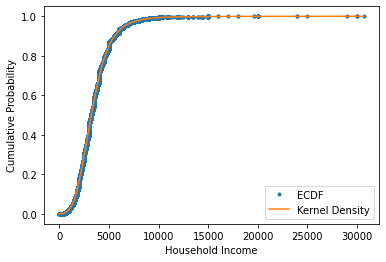

In [ ]:
# ECDF
# Extract the values of hhninc
hhninc_values = data["hhninc"].values

# Sort the values of hhninc
x = np.sort(hhninc_values)

# Compute the empirical cumulative distribution function (ECDF)
y = np.arange(1, len(x)+1) / len(x)

# Estimate the kernel density function (KDE)
kde = gaussian_kde(hhninc_values)

# Create a range of values for the density plot
x_range = np.linspace(hhninc_values.min(), hhninc_values.max(), 1000)

# Calculate the probability density function (PDF) values for the range
pdf_values = kde(x_range)

# Integrate the PDF to get the cumulative distribution function (CDF)
cdf_values = np.cumsum(pdf_values) / np.sum(pdf_values)

# Plot the ECDF and density curve
fig, ax = plt.subplots()
ax.plot(x, y, marker='.', linestyle='none', label="ECDF")
ax.plot(x_range, cdf_values, label="Kernel Density")
ax.legend()
ax.set_xlabel("Household Income")
ax.set_ylabel("Cumulative Probability")
plt.show()